# Template

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch

pd.set_option("precision", 2)
torch.set_printoptions(precision=2, sci_mode=False)

%precision 2
%load_ext lab_black
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Start

In [2]:
# begin project ...

# Part 1

## Section A

In [3]:
x = np.random.randint(1000, size=50)
y = np.random.randint(1000, size=50)

In [40]:
(x + y)[:5]

array([1193, 1301,  303, 1166, 1053])

In [50]:
is_odd = ((x + y) % 2).astype("bool")
is_odd[:5]

array([ True,  True,  True, False,  True])

In [51]:
is_even = (((x + y) % 2) ^ 1).astype("bool")
is_even[:5]

array([False, False, False,  True, False])

In [52]:
bools = ((x + y) % 2) == 0
bools[:5]

array([False, False, False,  True, False])

In [53]:
~bools[:5]

array([ True,  True,  True, False,  True])

In [54]:
np.logical_not(bools)[:5]

array([ True,  True,  True, False,  True])

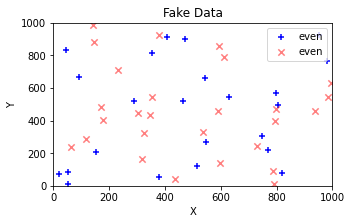

In [95]:
# https://matplotlib.org/api/markers_api.html

fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x[is_even], y[is_even], c="blue", label="even", s=30, marker="+")
ax.scatter(x[is_odd], y[is_odd], c="red", label="even", s=40, marker="x", alpha=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)
ax.set_title("Fake Data")
_ = ax.legend()

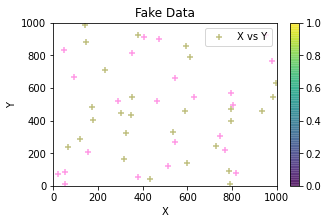

In [172]:
fig, ax = plt.subplots(figsize=(5, 3))
colors = np.array(["#ff33cc", "olive"])[is_odd.astype("int8")]
scatter = ax.scatter(x, y, label="X vs Y", color=colors, alpha=0.5, marker="+")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)
ax.set_title("Fake Data")
fig.colorbar(scatter)
_ = ax.legend()

## Section B

In [135]:
xs = np.linspace(0, 5, 10)
y1 = lambda x: (3 * x) + 0.5
y2 = lambda x: 5 * (x ** 0.5)

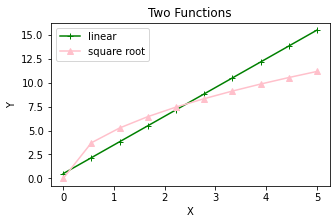

In [142]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(xs, y1(xs), color="green", marker="+", label="linear")
ax.plot(xs, y2(xs), color="pink", marker="^", label="square root")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Two Functions")
_ = ax.legend()

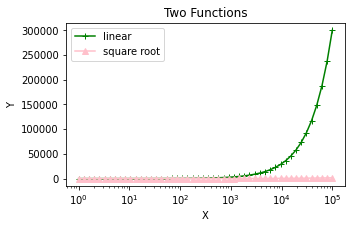

In [147]:
xs_log = np.logspace(0, 5)
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(xs_log, y1(xs_log), color="green", marker="+", label="linear")
ax.plot(xs_log, y2(xs_log), color="pink", marker="^", label="square root")
ax.set_xscale("log")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Two Functions")
_ = ax.legend()

## Section C

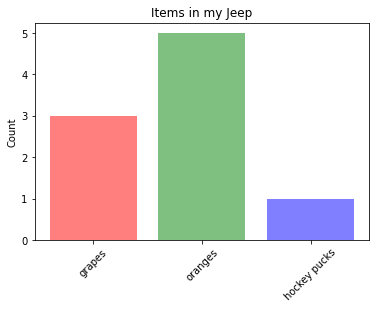

In [160]:
barheights = [3, 5, 1]
barlabels = ["grapes", "oranges", "hockey pucks"]
fig, ax = plt.subplots()
ax.bar(
    np.arange(len(barheights)), barheights, color=["red", "green", "blue"], alpha=0.5
)
x_pos = np.arange(len(barheights))
ax.set_xticks(x_pos)
ax.set_xticklabels(barlabels, rotation=45)
ax.set_ylabel("Count")
_ = ax.set_title("Items in my Jeep")

## Section D

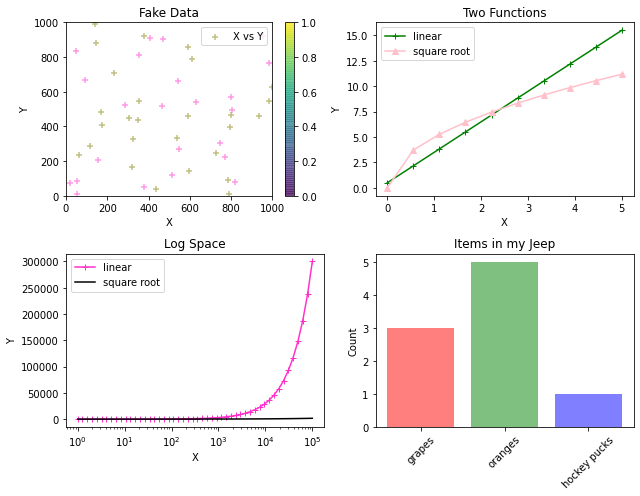

In [185]:
fig = plt.figure(figsize=(9, 7))

# scatter
ax = fig.add_subplot(2, 2, 1)
colors = np.array(["#ff33cc", "olive"])[is_odd.astype("int8")]
scatter = ax.scatter(x, y, label="X vs Y", color=colors, alpha=0.5, marker="+")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)
ax.set_title("Fake Data")
ax.legend()
fig.colorbar(scatter, ax=ax)

# linear
ax = fig.add_subplot(2, 2, 2)
ax.plot(xs, y1(xs), color="green", marker="+", label="linear")
ax.plot(xs, y2(xs), color="pink", marker="^", label="square root")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Two Functions")
ax.legend()

# log
ax = fig.add_subplot(2, 2, 3)
xs_log = np.logspace(0, 5)
ax.plot(xs_log, y1(xs_log), color="#ff33cc", marker="+", label="linear")
ax.plot(xs_log, y2(xs_log), color="black", label="square root")
ax.set_xscale("log")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Log Space")
ax.legend()

# bar
ax = fig.add_subplot(2, 2, 4)
barheights = [3, 5, 1]
barlabels = ["grapes", "oranges", "hockey pucks"]
ax.bar(
    np.arange(len(barheights)), barheights, color=["red", "green", "blue"], alpha=0.5
)
x_pos = np.arange(len(barheights))
ax.set_xticks(x_pos)
ax.set_xticklabels(barlabels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Items in my Jeep")

# final
fig.tight_layout()
fig.savefig("nice.png")

# Part 2

In [208]:
with open("data/bay_area_bikeshare/201402_weather_data_v2.csv") as f:
    labels = f.readline().strip().split(",")
lookup = [(i, label) for i, label in enumerate(labels)]
lookup[:3]

[(0, 'date'), (1, 'max_temperature_f'), (2, 'mean_temperature_f')]

In [191]:
cols = [2, 5, 8, 11, 14, 17]
filepath = "data/bay_area_bikeshare/201402_weather_data_v2.csv"
weather = np.loadtxt(filepath, delimiter=",", skiprows=1, usecols=cols)

In [189]:
weather.shape

(920, 6)

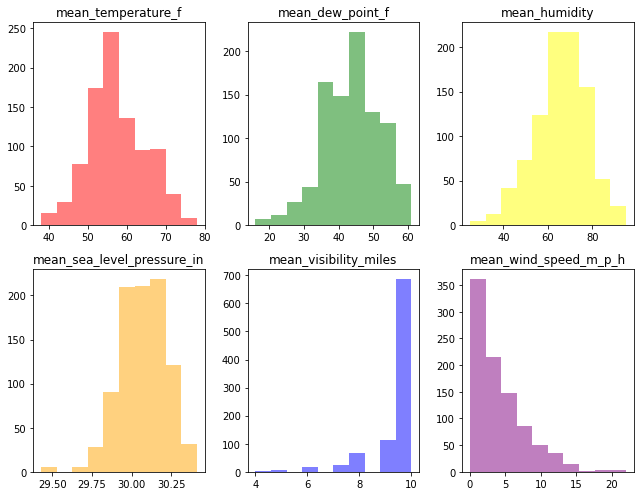

In [213]:
fig = plt.figure(figsize=(9, 7))
colors = ["red", "green", "yellow", "orange", "blue", "purple"]
for i, c in enumerate(cols):
    ax = fig.add_subplot(2, 3, i + 1)
    data = weather[:, i]
    color = colors[i]
    title = lookup[c][-1]
    ax.hist(data, bins=10, color=color, alpha=0.5)
    ax.set_title(title)
fig.tight_layout()

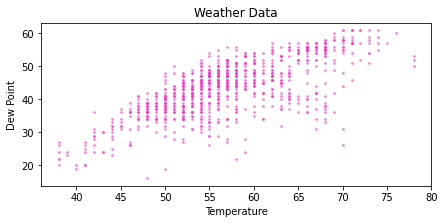

In [225]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.scatter(weather[:, 0], weather[:, 1], s=3, alpha=0.5, color="#ff33cc")
ax.set_xlabel("Temperature")
ax.set_ylabel("Dew Point")
_ = ax.set_title("Weather Data")